## SOM 

Cargamos el modelo de som ya entrenado en [som_ontologias](./som_ontologias.ipynb)

In [1]:
import pandas as pd
import numpy  as np
%matplotlib inline

from matplotlib import pyplot as plt
from sklearn.preprocessing   import MinMaxScaler, StandardScaler, scale


from minisom import MiniSom
#from sompy.sompy import som


### Dataframe 

Recuperamos los datos

In [2]:
df_ext = pd.read_csv('fams_ontologia_KH.csv', index_col=0)
df_ext.head()

,familia,hydrolase,electron transfer activity,protein dimerization activity,isomerase,motor activity,transferase,transmembrane transporter,translation initiation factor activity,binding,...,oxidoreductase,ligase,structural molecule activity,catalytic activity,lyase,copper chaperone activity,a,b,H,K
0,PF00005,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.854726,0.399581,4.657690,0.568075
1,PF00006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.773303,0.465925,4.569146,0.404377
2,PF00009,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.725873,0.473624,4.744185,0.500737
3,PF00013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.488458,0.450859,4.864910,0.395101
4,PF00023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.985735,0.398635,4.477511,0.154919


In [3]:
#R original
#R = ['familia', 'a', 'b','hydrolase','isomerase', 'transferase', 'transmembrane transporter', 'translation initiation factor activity','binding', 'ligase', 'structural constituent', 'oxidoreductase', 'catalytic activity', 'lyase', 'H', 'K']

#R = ['familia', 'a', 'b', 'H', 'K' ]
#R = ['familia', 'binding', 'transferase', 'hydrolase']
R = ['familia', 'a', 'b', 'H', 'K', 'binding', 'transferase', 'hydrolase']

df = df_ext[R]
k = len(R)-1
#datos = scale(df_ext[R[1:]].values)
datos = MinMaxScaler().fit_transform(df_ext[R[1:]].values)
print(datos)
ln = int(np.sqrt(len(datos)))
print(ln)

[[0.37840447 0.28501824 0.64521865 ... 0.         0.         1.        ]
 [0.3358309  0.32662037 0.57972569 ... 1.         0.         0.        ]
 [0.31103123 0.33144816 0.70919583 ... 1.         0.         1.        ]
 ...
 [0.09606724 0.29032135 0.87887022 ... 1.         0.         0.        ]
 [0.34233853 0.3929628  0.60078891 ... 1.         0.         0.        ]
 [0.60877426 0.55411588 0.35840867 ... 1.         0.         0.        ]]
14


In [4]:
def genera_v_random(dim1=4,dim2=3):
    v = np.random.rand(dim1,)
    w = [np.random.randint(0,2) for _ in range(dim2)]
    return np.concatenate((v,np.array(w)))

def prots_aleatorias(N, dim1, dim2):
    V = []
    for i in range(N):
        V.append(genera_v_random(dim1,dim2))
    return np.array(V)

V = prots_aleatorias(50,4,3)
N = ['frand_{}'.format(i) for i in range(len(V))]
print(N)
print(V)

['frand_0', 'frand_1', 'frand_2', 'frand_3', 'frand_4', 'frand_5', 'frand_6', 'frand_7', 'frand_8', 'frand_9', 'frand_10', 'frand_11', 'frand_12', 'frand_13', 'frand_14', 'frand_15', 'frand_16', 'frand_17', 'frand_18', 'frand_19', 'frand_20', 'frand_21', 'frand_22', 'frand_23', 'frand_24', 'frand_25', 'frand_26', 'frand_27', 'frand_28', 'frand_29', 'frand_30', 'frand_31', 'frand_32', 'frand_33', 'frand_34', 'frand_35', 'frand_36', 'frand_37', 'frand_38', 'frand_39', 'frand_40', 'frand_41', 'frand_42', 'frand_43', 'frand_44', 'frand_45', 'frand_46', 'frand_47', 'frand_48', 'frand_49']
[[0.79108488 0.15429891 0.44228551 0.16300584 0.         1.
  1.        ]
 [0.87648395 0.40261659 0.79376359 0.41058248 0.         0.
  0.        ]
 [0.59773249 0.68922538 0.26694008 0.17460513 1.         0.
  1.        ]
 [0.09460874 0.32881896 0.33199664 0.80987341 0.         1.
  0.        ]
 [0.03552218 0.15618361 0.6811134  0.70455465 0.         1.
  1.        ]
 [0.45851582 0.77663988 0.438635   0.77

In [5]:
k

7

### Modelo entrenado

In [6]:
%matplotlib inline
import numpy as np
import csv


import pandas as pd
from matplotlib import pyplot as plt

from sklearn.neural_network  import MLPClassifier
from sklearn.neural_network  import BernoulliRBM
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline        import Pipeline
from sklearn.preprocessing   import MinMaxScaler, StandardScaler, scale


from minisom import MiniSom
#from sompy.sompy import som

import seaborn as sns

import pickle 


In [16]:
np.random.seed(sum(list(map(ord,'rids'))))

In [17]:
#si deseamos recuperar algún modelo anterio

recupera=False
if(recupera):
    som = pickle.load(open('som_13x12_500_s1_ca1.pkl','rb'))
else:
    ln=14 
    dim_som = (ln,ln)
    sigmas = [0.7,1,1.5,2,3]  #sigmas a intentar
    constantes = [1,2,3]  #constantes de aprendizaje a buscar
    errores = []
    buscar=True
    if(buscar):
        for s in sigmas:
            for c in constantes:
                som = MiniSom(dim_som[0], dim_som[1], k, sigma=s, learning_rate=c, 
                              activation_distance='euclidean', topology='hexagonal', 
                              neighborhood_function='gaussian', random_seed=sum(constantes))
                som.pca_weights_init(datos)
                som.train_batch(datos,1000, verbose=False)
                q = som.quantization_error(datos)
                errores.append( (s,c, q) )
                print( "s: {}  c: {} -> q: {}".format(s,c,q))
    else:
        errores = [(1.5,3,0.0755)]
    mejor = sorted(errores, key=lambda x: x[2])[0]
    print("Sigma {}, ca {}".format(mejor[0], mejor[1]))
  

s: 0.7  c: 1 -> q: 0.13620798109933022
s: 0.7  c: 2 -> q: 0.11088206351231684
s: 0.7  c: 3 -> q: 0.10685250614697972
s: 1  c: 1 -> q: 0.10433157290845609
s: 1  c: 2 -> q: 0.08207139607180215
s: 1  c: 3 -> q: 0.05843014870817991
s: 1.5  c: 1 -> q: 0.08238434965426833
s: 1.5  c: 2 -> q: 0.05775875494382677
s: 1.5  c: 3 -> q: 0.05076191095738472
s: 2  c: 1 -> q: 0.08731005265018842
s: 2  c: 2 -> q: 0.07806494188195737
s: 2  c: 3 -> q: 0.07805499015882875
s: 3  c: 1 -> q: 0.11642431500309783
s: 3  c: 2 -> q: 0.11996205989957373
s: 3  c: 3 -> q: 0.126245931439567
Sigma 1.5, ca 3


In [19]:
dir(som)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_activate',
 '_activation_distance',
 '_activation_map',
 '_bubble',
 '_chebyshev_distance',
 '_check_input_len',
 '_check_iteration_number',
 '_cosine_distance',
 '_decay_function',
 '_distance_from_weights',
 '_euclidean_distance',
 '_gaussian',
 '_input_len',
 '_learning_rate',
 '_manhattan_distance',
 '_mexican_hat',
 '_neigx',
 '_neigy',
 '_random_generator',
 '_sigma',
 '_triangle',
 '_weights',
 '_xx',
 '_yy',
 'activate',
 'activation_response',
 'convert_map_to_euclidean',
 'distance_map',
 'get_euclidean_coordinates',
 'get_weights',
 'labels_map',
 'neighborhood',
 'pca_weights_init',
 'quantization',
 'quanti

Usamos el modelo entrenado

In [27]:
som = MiniSom(dim_som[0], dim_som[1], k, sigma=mejor[0], learning_rate=mejor[1], 
              activation_distance='euclidean', topology='hexagonal', 
              neighborhood_function='gaussian', random_seed=sum(constantes))
som.pca_weights_init(datos)
som.train_batch(datos,1000, verbose=True)

qe = som.quantization_error(datos)

print('Error de cuantización {0:0.5f}'.format(q))

 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.05076191095738472
Error de cuantización 0.05076


In [29]:
nombres = df_ext['familia'].values
qnt = som.quantization(datos)
print(len(qnt))
print(len(R[1:])==k)

206
True


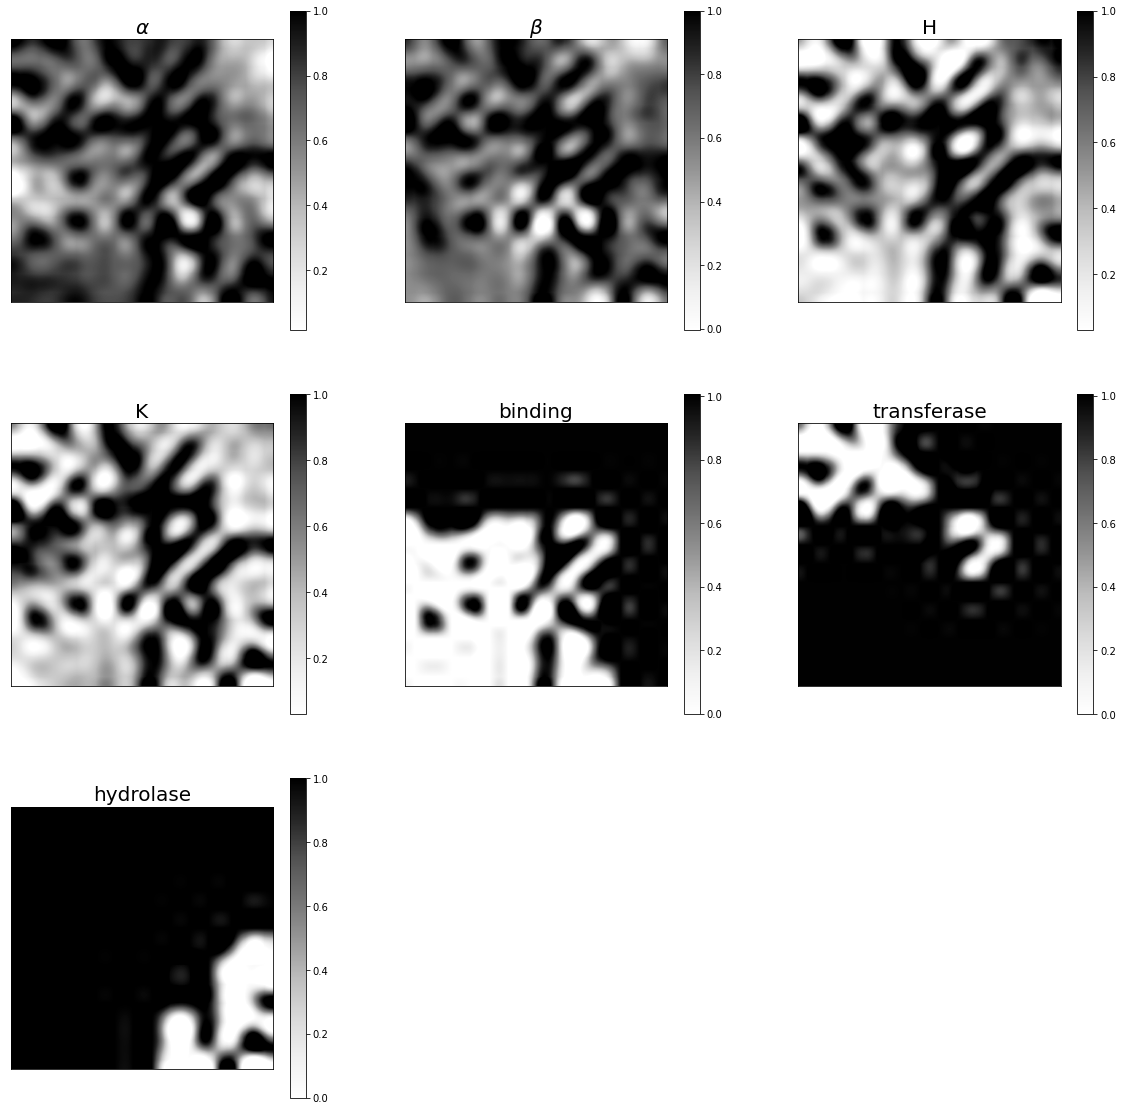

In [30]:
color='Greys'
inter='sinc'
rs, cs = 3,3
fig, axn = plt.subplots(rs,cs, figsize=(20,20))

titulos = ['', r'$\alpha$', r'$\beta$', 'H', 'K', 'binding', 'transferase', 'hydrolase' ]
for j,ax in enumerate(axn.flat):
    if(j<k):
        D = np.zeros(dim_som)
        for ix,d in enumerate(datos):
            w = som.winner(d)
            D[w] = qnt[ix][j]
        plt.subplot(rs,cs,j+1)
        plt.xticks([])
        plt.yticks([])
        plt.title(titulos[j+1], fontsize=20)
        plt.imshow(1-D,interpolation=inter,cmap=color)
        plt.colorbar()
        ax.axis('off')
    else:
        ax.axis('off')
    

Graficamos tomando como base [liga](https://github.com/JustGlowing/minisom/blob/master/examples/HexagonalTopology.ipynb)

In [29]:
from matplotlib.patches import RegularPolygon, Ellipse
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import cm, colorbar
from matplotlib.lines import Line2D


from bokeh.colors import RGB
from bokeh.io import curdoc, show, output_notebook
from bokeh.transform import factor_mark, factor_cmap
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.plotting import figure, output_file


# display matplotlib plots in notebook
%matplotlib inline
# display bokeh plot in notebook
output_notebook()

Loading BokehJS ...

Vamos a usar los siguientes parámetros en la graficación

In [30]:
##Círculos azules = binding ontology
##Equis morado = Transferase ontology
##Triángulo invertido  amarillo ocre = Binding-transferase ontologies
##Pentágono rojo =  hidrolase ontology
##Más amarillo = BInding-hidrolase ontologies
##Cuadrado verde = other ontologies

seleccion = [ ('o', '#0000ff'), #circulo azul                - binding
              ('s', '#009933'), #cuadrado verde              - other
              ('p', '#e60000'), #pentagono rojo              - hidrolase
              ('X', '#800080'), #X morado                    - transferase
              ('P', '#ffff00'), #triangulo purpura           - binding hidrolase
              ('v', '#ffa500')  #triangulo invertido naranga - binding transferase
    
]

marcadores = [x[0] for x in seleccion]
colores    = [x[1] for x in seleccion]
textos     = ["Binding", "Transferase", "Binding-transferase", "Hidrolase", "Binding-hidrolase", "Other"]
text_d     = {'Binding'            : ('o', '#0000ff'), 
              'Transferase'        : ('X', '#800080'),
              'Binding-transferase': ('v', '#ffa500'),
              'Hidrolase'          : ('p', '#e60000'),
              'Other'              : ('s', '#009933'),
              'Binding-hidrolase'  : ('P', '#ffff00')}


In [26]:
xx, yy = som.get_euclidean_coordinates()
umatrix = som.distance_map()
weights = som.get_weights()

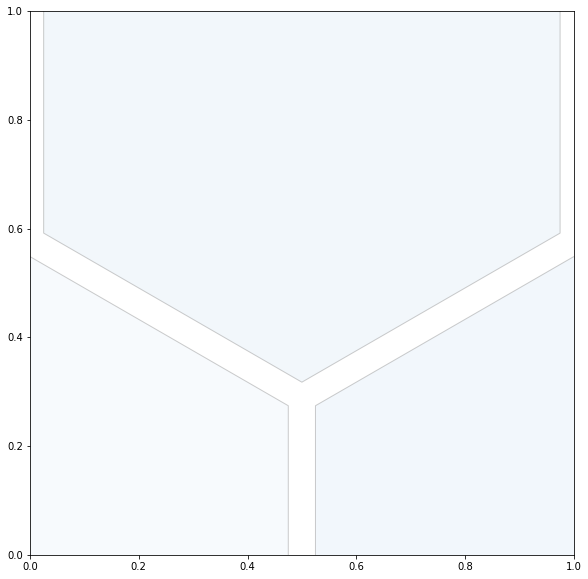

In [27]:
f = plt.figure(figsize=(10,10))
ax = f.add_subplot(111)

ax.set_aspect('equal')

# iteratively add hexagons
for i in range(weights.shape[0]):
    for j in range(weights.shape[1]):
        wy = yy[(i, j)] * np.sqrt(3) / 2
        hex = RegularPolygon((xx[(i, j)], wy), 
                             numVertices=6, 
                             radius=.95 / np.sqrt(3),
                             facecolor=cm.Blues(umatrix[i, j]), 
                             alpha=.4, 
                             edgecolor='gray')
        ax.add_patch(hex)

